In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 
import matplotlib.animation as anim

In [101]:
#Punto 1. Usando la clase Particle y modificándola
class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt  = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        #Energía de las partículas)
        self.kE = 0
        self.pE = 0
        self.kEGraph = np.zeros(len(t))
        self.pEGraph = np.zeros(len(t))
        
        #Fuerza que siente la partícula
        self.Fuerza = self.m * self.a
        
        
    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        self.SetEnergy(i,self.v,self.r)
        self.a = self.Fuerza/self.m
        
        #Calculo de energía cinética
        self.kE = 0.5*self.m*(np.dot(self.v,self.v))
        
       # print(self.r)
        
        # Euler method
        self.r = self.r + (self.dt * self.v)
        self.v = (self.v + (self.dt * self.a))
        
    
    def CheckWallLimits(self,limits,dim=2):
        
        for i in range(dim):
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = - self.v[i]
                
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = - self.v[i]
                
    def reset(self):
        self.Fuerza[:]=0
        self.a[:]=0
        self.pE = 0
    
    # Setters
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    #Se cambia SetVelocity para que así tenga en cuenta los cambios de energía
    def SetVelocity(self,i,v):
        self.vVector[i] =v 
        
    def SetEnergy(self,i,v,r):
        self.kEGraph[i] = self.kE
        self.pEGraph[i] = self.pE
        
    #Obtiene la fuerza de otro objeto
    def ObtFuerza(self,p2,k):
        dist = np.linalg.norm(self.r - p2.GetPosition())
        lim = self.radius + p2.GetR()
        
        if dist < lim:
            magF = k*(dist**3)#/dist
            self.Fuerza = np.add(self.Fuerza, magF*(self.r - p2.GetPosition()))
            self.pE = k*(dist**4)/4
        
    # Getters  
    def GetPosition(self):
        return self.r
    
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 
    
    def GetVVelocityVector(self):
        return self.VvVector 

    def GetVelocityVector(self):
        return self.vVector
    
    def GetR(self):
        return self.radius
    
    def GetTEnergy(self):
        return np.array(self.pEGraph)+np.array(self.kEGraph)
    
    def GetKEnergy(self):
        return np.array(self.kEGraph)
    
    def GetPEnergy(self):
        return np.array(self.pEGraph)
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        self.VvVector = np.array([self.vVector[0]])
        
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
        for i in range(1,len(self.vVector)):
            if i%factor == 0:
                self.VvVector = np.vstack([self.VvVector,self.vVector[i]])

In [204]:
#Necesarios para la simulación
dt = 1e-4
tmax = 10
t = np.arange(0,tmax+dt,dt)
r0 = np.array([[-5,1.9],[0,-1.6],[-15,-15]]) #(?,?)=(-5,1.9), se calculó adivinando
v0 = np.array([[20,0],[0,0],[0,0]])
a0 = np.array([[0,0],[0,0],[0,0]])
rad = 2
m = 1
k = 100
Limits = np.array([20.,20.])

In [205]:
#Generando las particulas 
p1 = Particle(r0[0],v0[0],a0[0],t,m,rad,1) 
p2 = Particle(r0[1],v0[1],a0[1],t,m,rad,2)
p3 = Particle(r0[2],v0[2],a0[2],t,m,rad,3)
ps = np.array([p1,p2,p3])

#Generando la simulación
def RunSimulation(t):
    
    Particles = ps
    
    for it in tqdm(range(len(t))): # Evolucion temporal
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i!=j:
                    Particles[i].ObtFuerza(Particles[j],k)
            
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].reset()
            Particles[i].CheckWallLimits(Limits)
        
        
    return Particles

Billar = RunSimulation(t)



  0%|                                                                                       | 0/100001 [00:00<?, ?it/s]

  1%|▋                                                                          | 975/100001 [00:00<00:10, 9679.44it/s]

  2%|█▎                                                                        | 1840/100001 [00:00<00:10, 9323.63it/s]

  3%|██▏                                                                       | 2956/100001 [00:00<00:09, 9793.92it/s]

  4%|██▉                                                                      | 4081/100001 [00:00<00:09, 10168.34it/s]

  5%|███▊                                                                     | 5175/100001 [00:00<00:09, 10366.57it/s]

  6%|████▌                                                                     | 6097/100001 [00:00<00:09, 9970.17it/s]

  7%|█████▏                                                                    | 6989/100001 [00:00<00:09, 9545.78it/s]

  8%|█████▊                   

 61%|████████████████████████████████████████████▏                           | 61416/100001 [00:07<00:03, 10176.01it/s]

 62%|████████████████████████████████████████████▉                           | 62499/100001 [00:07<00:03, 10348.48it/s]

 64%|█████████████████████████████████████████████▋                          | 63537/100001 [00:07<00:03, 10255.97it/s]

 65%|██████████████████████████████████████████████▍                         | 64565/100001 [00:07<00:03, 10181.14it/s]

 66%|███████████████████████████████████████████████▏                        | 65588/100001 [00:07<00:03, 10193.78it/s]

 67%|███████████████████████████████████████████████▉                        | 66611/100001 [00:07<00:03, 10182.36it/s]

 68%|████████████████████████████████████████████████▋                       | 67701/100001 [00:07<00:03, 10365.83it/s]

 69%|█████████████████████████████████████████████████▍                      | 68748/100001 [00:07<00:03, 10377.41it/s]

 70%|███████████████████████████

<IPython.core.display.Javascript object>


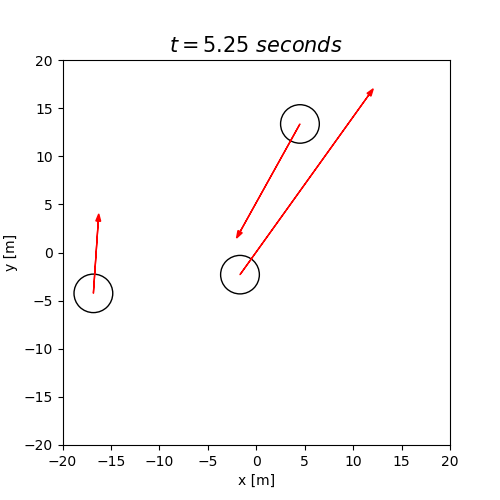

In [206]:
#Métodos dados en clase para animar y reducir el tiempo de animación aplicados al billar

def ReduceTime(t,factor):
    
    for p in ps:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)


#Se selecciona 10, pues se ve rápido y relativamente fluido a esta tasa
redt = ReduceTime(t,500)


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    plot = ax.set_xlabel("x [m]")
    plot = ax.set_ylabel("y [m]")
    
    for p in ps:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        
        vx = p.GetVVelocityVector()[i,0]
        vy = p.GetVVelocityVector()[i,1]
        
        circle = plt.Circle( (x,y), p.GetR(), color='k', fill=False)
        plot = ax.add_patch(circle)
        plot = ax.arrow(x,y,vx,vy,color='r',head_width=0.5)
        
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

<IPython.core.display.Javascript object>


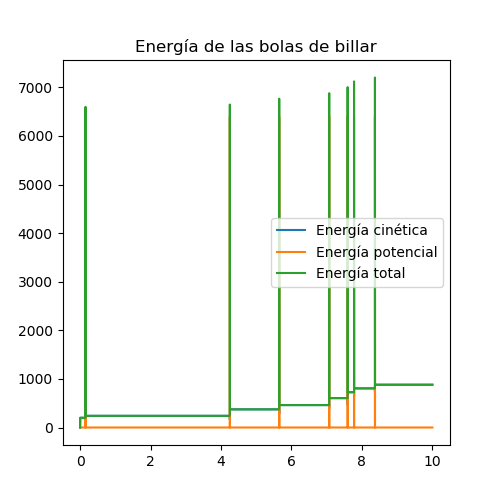

In [207]:
#Gráfica de energías. Energía cinética
eK,eP,eT = 0,0,0
for i in range(len(ps)):
    eP+=ps[i].GetPEnergy()
    eK+= ps[i].GetKEnergy()


eP *=0.5 #Se está sumando la energía potencial dos veces, por esto se divide por 2
eT = eP + eK

figP1 = plt.figure(figsize=(5,5))
en1 = figP1.add_subplot(111)
en1.plot(t,eK,label="Energía cinética",linestyle="-")
en1.plot(t,eP,label="Energía potencial",linestyle="-")
en1.plot(t,eT,label="Energía total",linestyle="-")
en1.set_title("Energía de las bolas de billar")
en1.legend()

In [208]:
#Punto 2. Cargando datos 
dataP2 = np.loadtxt("https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EnergiaPotencialGas2D.txt")

<IPython.core.display.Javascript object>


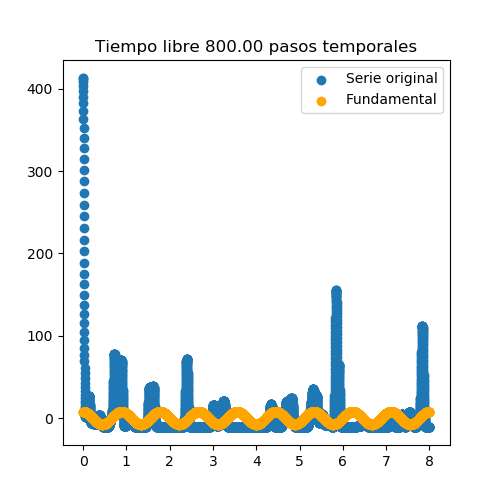

In [209]:
tiempo = dataP2[:,0]
potencial = dataP2[:,1] 
potencial -= np.mean(potencial)

fftPot = np.fft.fft(potencial)
potFreq = np.fft.fftfreq(len(potencial))
fouPot = np.abs(fftPot)/len(potencial)

#Filtrando datos
masc = potFreq > 0
fouPot = 2*fouPot[masc]
potFreq = potFreq[masc]
frecMax = potFreq[np.argmax(fouPot)]
fouPot[potFreq != frecMax] = 0

#Volviendo al espacio temporal
fouPotI = np.fft.ifft(fouPot)
fouPotI = fouPotI*len(fouPotI)+np.mean(potencial)
tempPotI = np.linspace(min(tiempo),max(tiempo),len(fouPotI))

figP2 = plt.figure(figsize=(5,5))
grP2 = figP2.add_subplot(111)
grP2.set_title("Tiempo libre {:.2f} pasos temporales".format(1/frecMax))
grP2.scatter(tiempo,potencial,label="Serie original")
grP2.scatter(tempPotI,fouPotI,label="Fundamental",c="orange")
grP2.legend()

<IPython.core.display.Javascript object>


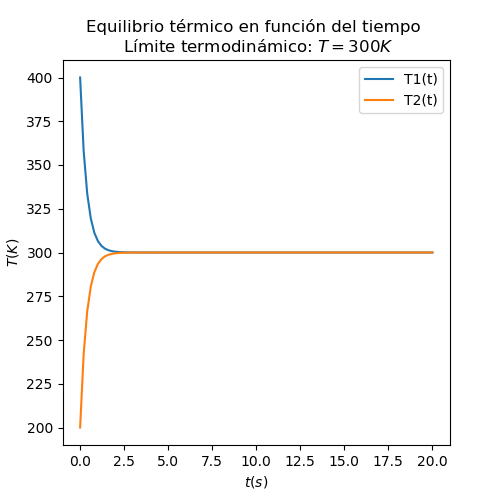

In [210]:
#Punto 3. Guardando constantes y condiciones iniciales
cv = 3/2*(8.314472)

n = 1
k = 389.6
A = 0.01
l = 0.3

C = k*A/(n*cv*l)
T0 = [400,200]

#Solucionando el sistema de ecuaciones dado por Euler
def f1(T1,T2):
    return -C*(T1-T2)

def f2(T1,T2):
    return C*(T1-T2)

def solP3(f1,f2,T0,t):
    h = (t[-1]-t[0])/(len(t)-1)
    
    T1,T2 = np.zeros(len(t)),np.zeros(len(t))
    T1[0], T2[0] = T0[0],T0[1]
    
    k1 = np.zeros(2)
    
    for i in range(1,len(t)):
        k1[0] = f1(T1[i-1],T2[i-1])
        k1[1] = f2(T1[i-1],T2[i-1])
        
        T1[i] = T1[i-1]+h*k1[0]
        T2[i] = T2[i-1]+h*k1[1]
        
    return T1,T2

t = np.linspace(0,20,100)
T1,T2 = solP3(f1,f2,T0,t)
        
    
figP3 = plt.figure(figsize=(5,5))
grP3 = figP3.add_subplot(1,1,1)
grP3.set_title("Equilibrio térmico en función del tiempo \n Límite termodinámico: $T =300K$")
grP3.plot(t,T1,label="T1(t)")
grP3.plot(t,T2,label="T2(t)")
grP3.set_xlabel("$t(s)$")
grP3.set_ylabel("$T (K)$")
grP3.legend()


<IPython.core.display.Javascript object>


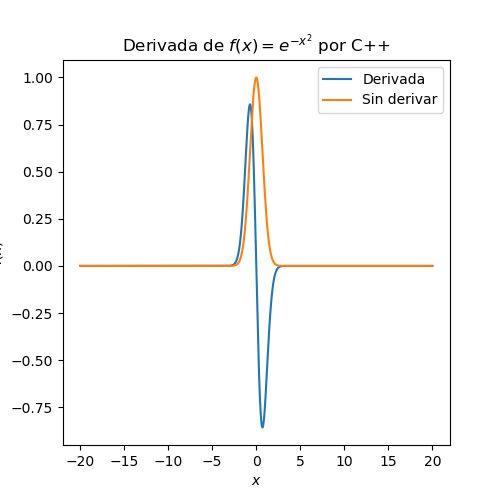

In [211]:
#Punto 4. Importando los datos del archivo datosDerivadaCentral.dat
dataP4 = np.loadtxt("datosDerivadaCentral.txt")
xP4 = dataP4[:,0]
yP4 = dataP4[:,1]

sinDerivar = lambda x: np.exp(-x**2)

figP4 = plt.figure(figsize=(5,5))
grP4 = figP4.add_subplot(111)
grP4.set_title("Derivada de $f(x) = e^{-x^2}$ por C++")
grP4.plot(xP4,yP4,label="Derivada")
grP4.plot(xP4,sinDerivar(xP4),label="Sin derivar")
grP4.set_xlabel("$x$")
grP4.set_ylabel("$f(x)$")
grP4.legend()